Mounting the Drive

Check the content of the drive



Read in the dataset

- Usually, pandas allows us to read files in and create a dataframe from it. Let's try read_csv() and see its head()

- File at '/content/drive/MyDrive/Colab_Notebooks/iris.csv'

In [1]:
import pandas as pd

df = pd.read_csv('iris.data', header = None)

In [2]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Understanding the dataset


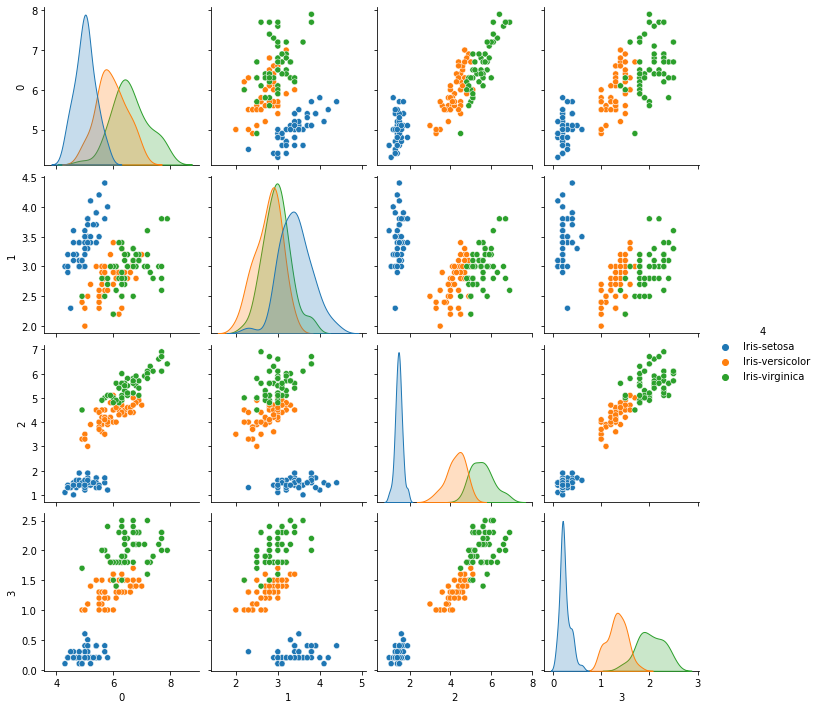

In [3]:
import seaborn as sns
sns.pairplot(df,hue=4)

Preprocessing

- Training set, test set

In [4]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)

In [5]:
training_data.head() #Random state = 25

,0,1,2,3,4
54,6.5,2.8,4.6,1.5,Iris-versicolor
113,5.7,2.5,5.0,2.0,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
4,5.0,3.6,1.4,0.2,Iris-setosa
115,6.4,3.2,5.3,2.3,Iris-virginica


In [6]:
training_data.head() #Random state = 42

,0,1,2,3,4
54,6.5,2.8,4.6,1.5,Iris-versicolor
113,5.7,2.5,5.0,2.0,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
4,5.0,3.6,1.4,0.2,Iris-setosa
115,6.4,3.2,5.3,2.3,Iris-virginica


In [7]:
training_data.head() #Random state = 25 (2nd time)

,0,1,2,3,4
54,6.5,2.8,4.6,1.5,Iris-versicolor
113,5.7,2.5,5.0,2.0,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
4,5.0,3.6,1.4,0.2,Iris-setosa
115,6.4,3.2,5.3,2.3,Iris-virginica


The Model
- Decision tree

In [8]:
training_data.head()

,0,1,2,3,4
54,6.5,2.8,4.6,1.5,Iris-versicolor
113,5.7,2.5,5.0,2.0,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
4,5.0,3.6,1.4,0.2,Iris-setosa
115,6.4,3.2,5.3,2.3,Iris-virginica


In [9]:
X = training_data.iloc[:,0:4]
Y = training_data.iloc[:,4]

In [10]:
# trained 
# create model
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

The Result
- Model
- Confusion Matrix
- 

In [11]:
X_test = testing_data.iloc[:,0:4]
Y_test = testing_data.iloc[:,4]

In [12]:
# test model
result = clf.predict(X_test)

In [13]:
# Unknow
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, result)

array([[ 9,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  8]], dtype=int64)

c:\Users\Kla\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


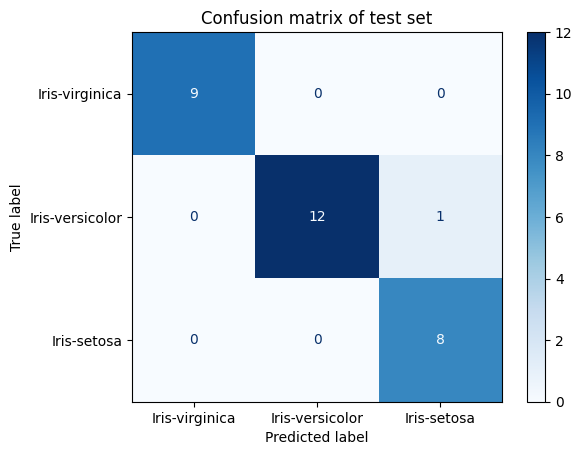

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,
                      X_test,
                      Y_test,
                      display_labels=list(set(Y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of test set')
plt.show() 

In [15]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, result))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

